<a href="https://www.kaggle.com/code/shiviyadav/customer-churn-prediction-eda-ml-techniques?scriptVersionId=107345099" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Import Required Libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customers/BankChurners.csv


# Load Dataset

In [2]:
df= pd.read_csv("/kaggle/input/credit-card-customers/BankChurners.csv")

# Display and Analyse the dataset

In [3]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [4]:
df.head().style.set_properties(**{"background-color": "black","color": "white", "border-color": "black","font-size":"11.5pt",'width': 200})

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.000000,777,11914.000000,1.335000,1144,42,1.625000,0.061000,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.000000,864,7392.000000,1.541000,1291,33,3.714000,0.105000,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.000000,0,3418.000000,2.594000,1887,20,2.333000,0.000000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.000000,2517,796.000000,1.405000,1171,20,2.333000,0.760000,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.000000,0,4716.000000,2.175000,816,28,2.500000,0.000000,0.000022,0.999980


In [5]:
df.shape

(10127, 23)

In [6]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127.0,7.391776e+08,3.690378e+07,7.080821e+08,7.130368e+08,7.179264e+08,7.731435e+08,8.283431e+08
Customer_Age,10127.0,4.632596e+01,8.016814e+00,2.600000e+01,4.100000e+01,4.600000e+01,5.200000e+01,7.300000e+01
Dependent_count,10127.0,2.346203e+00,1.298908e+00,0.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,5.000000e+00
Months_on_book,10127.0,3.592841e+01,7.986416e+00,1.300000e+01,3.100000e+01,3.600000e+01,4.000000e+01,5.600000e+01
Total_Relationship_Count,10127.0,3.812580e+00,1.554408e+00,1.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00,6.000000e+00
Months_Inactive_12_mon,10127.0,2.341167e+00,1.010622e+00,0.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
Contacts_Count_12_mon,10127.0,2.455317e+00,1.106225e+00,0.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
Credit_Limit,10127.0,8.631954e+03,9.088777e+03,1.438300e+03,2.555000e+03,4.549000e+03,1.106750e+04,3.451600e+04
Total_Revolving_Bal,10127.0,1.162814e+03,8.149873e+02,0.000000e+00,3.590000e+02,1.276000e+03,1.784000e+03,2.517000e+03
Avg_Open_To_Buy,10127.0,7.469140e+03,9.090685e+03,3.000000e+00,1.324500e+03,3.474000e+03,9.859000e+03,3.451600e+04


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

# Checking the presence of missing values

In [9]:
df.isnull().sum()

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

In [10]:
# Dropping the last two columns and the client number column
df = df.iloc[:,1:-2]


In [11]:
df.shape

(10127, 20)

In [12]:
#The dimensions of the dataset.......
df.ndim


2

In [13]:
#The size of the dataset.......
df.size


202540

In [14]:
#The columns we have in the dataset.....
df.columns


Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [15]:
df.dtypes

Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

In [16]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

# visualize the dataset to check the presence of missing value

<AxesSubplot:>

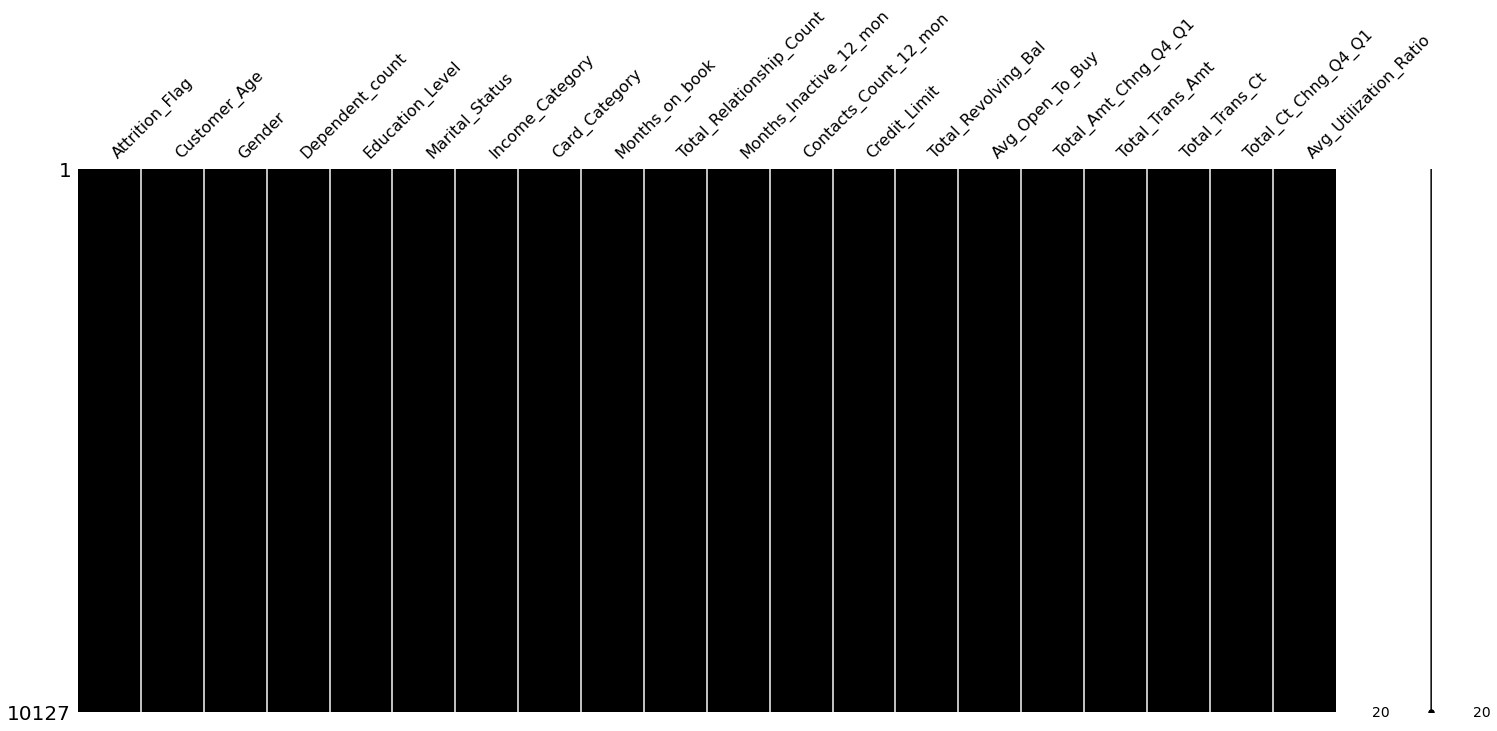

In [17]:
#Visualizing the missing values
import missingno as mn
mn.matrix(df,color=(0,0,0))

In [18]:
#PERCENTAGE OF THE MISSING VALUES - DataFrame..... 
def missing_data(df):
    total = df.isnull().sum().sort_values(ascending = False)
    Percentage = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, Percentage], axis=1, keys=['Total', 'Percentage'])

In [19]:
missing_data(df).style.set_properties(**{"background-color": "black","color": "white", "border-color": "black","font-size":"11.5pt",'width': 200})

,Total,Percentage
Attrition_Flag,0,0.000000
Customer_Age,0,0.000000
Total_Ct_Chng_Q4_Q1,0,0.000000
Total_Trans_Ct,0,0.000000
Total_Trans_Amt,0,0.000000
Total_Amt_Chng_Q4_Q1,0,0.000000
Avg_Open_To_Buy,0,0.000000
Total_Revolving_Bal,0,0.000000
Credit_Limit,0,0.000000
Contacts_Count_12_mon,0,0.000000


Insights: There is no missing value in dataset

# Finding the duplicates from dataset...


In [20]:
df[df.duplicated()]

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio


# Basic concept of Statistics

# 1.Statistics on Categorical data......


In [21]:
round(df.describe(exclude = 'object'), 2)

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00
mean,46.33,2.35,35.93,3.81,2.34,2.46,8631.95,1162.81,7469.14,0.76,4404.09,64.86,0.71,0.27
std,8.02,1.30,7.99,1.55,1.01,1.11,9088.78,814.99,9090.69,0.22,3397.13,23.47,0.24,0.28
min,26.00,0.00,13.00,1.00,0.00,0.00,1438.30,0.00,3.00,0.00,510.00,10.00,0.00,0.00
25%,41.00,1.00,31.00,3.00,2.00,2.00,2555.00,359.00,1324.50,0.63,2155.50,45.00,0.58,0.02
50%,46.00,2.00,36.00,4.00,2.00,2.00,4549.00,1276.00,3474.00,0.74,3899.00,67.00,0.70,0.18
75%,52.00,3.00,40.00,5.00,3.00,3.00,11067.50,1784.00,9859.00,0.86,4741.00,81.00,0.82,0.50
max,73.00,5.00,56.00,6.00,6.00,6.00,34516.00,2517.00,34516.00,3.40,18484.00,139.00,3.71,1.00


# 2.Statistics on numerical data


In [22]:
round(df.describe(exclude = ['float', 'int64']),2)

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
count,10127,10127,10127,10127,10127,10127
unique,2,2,7,4,6,4
top,Existing Customer,F,Graduate,Married,Less than $40K,Blue
freq,8500,5358,3128,4687,3561,9436


In [23]:
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [24]:
# Changing the Attrition_Flag to 0 and 1 (Hidden Input/Output)
df["Attrition_Flag"] = df["Attrition_Flag"].map({"Existing Customer":0, "Attrited Customer":1})


In [25]:
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,0,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,0,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,0,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,0,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


# Checking the presence of Outliers

In [26]:
#Finding the outliers....
continuous_feature = [feature for feature in df.columns if df[feature].dtypes != 'O']
Colors = ['#f03a17']

In [27]:
## Lets analyse the continuous values by creating histograms to understand the distribution

import plotly.express as px

for feature in continuous_feature:
    data=df.copy()
    fig = px.histogram(df, x= feature,title= 'Distribution of '+feature,color_discrete_sequence= Colors)
    fig.show()
    print("Skewness: %f" % df['Attrition_Flag'].skew())
    print("Kurtosis: %f" % df['Attrition_Flag'].kurt())

Skewness: 1.848449
Kurtosis: 1.417043


Skewness: 1.848449
Kurtosis: 1.417043


Skewness: 1.848449
Kurtosis: 1.417043


Skewness: 1.848449
Kurtosis: 1.417043


Skewness: 1.848449
Kurtosis: 1.417043


Skewness: 1.848449
Kurtosis: 1.417043


Skewness: 1.848449
Kurtosis: 1.417043


Skewness: 1.848449
Kurtosis: 1.417043


Skewness: 1.848449
Kurtosis: 1.417043


Skewness: 1.848449
Kurtosis: 1.417043


Skewness: 1.848449
Kurtosis: 1.417043


Skewness: 1.848449
Kurtosis: 1.417043


Skewness: 1.848449
Kurtosis: 1.417043


Skewness: 1.848449
Kurtosis: 1.417043


Skewness: 1.848449
Kurtosis: 1.417043


# EDA & Visualization On Numerical Analysis

In [28]:
# list of numerical variables............
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
print('Number of numerical variables: ', len(numerical_features))
print('\n')
print('Numberical Variables Column: ',numerical_features)
print('\n')
# visualise the numerical variables........
df[numerical_features].head()

Number of numerical variables:  15


Numberical Variables Column:  ['Attrition_Flag', 'Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']




,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,0,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,0,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,0,40,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,0,40,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [29]:
from IPython.core.display import HTML

def multi_table(table_list):
    ''' Acceps a list of IpyTable objects and returns a table which contains each IpyTable in a cell
    '''
    return HTML(
        '<table><tr style="background-color:white;">' + 
        ''.join(['<td>' + table._repr_html_() + '</td>' for table in table_list]) +
        '</tr></table>')

In [30]:
df_nunique = {var: pd.DataFrame(df['Attrition_Flag'].value_counts()) 
              for var in {'Attrition_Flag'}}
multi_table([ df_nunique['Attrition_Flag']])

,Attrition_Flag
0,8500
1,1627


In [31]:
from plotly import tools
from plotly.subplots import make_subplots
from plotly.offline import iplot
import plotly.graph_objs as go

fig = make_subplots(rows=1,cols=1)
Colors = ['#0078d7','#16c60c','#f03a17','#00f8d7','#f0f87f']
fig.add_trace(go.Bar(y = df['Attrition_Flag'].value_counts().values.tolist(), 
                      x = df['Attrition_Flag'].value_counts().index, 
                      text=df['Attrition_Flag'].value_counts().values.tolist(),
              textfont=dict(size=15),
                      textposition = 'outside',
                      showlegend=False,
              marker = dict(color = Colors,
                            line_color = 'black',
                            line_width=3)),row = 1,col = 1)
fig.update_layout(title={'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  template='plotly_white')
fig.update_yaxes(range=[0,10500])
iplot(fig)

# Analyze the Customer Age

In [32]:
df_nunique = {var: pd.DataFrame(df['Customer_Age'].value_counts()) 
              for var in {'Customer_Age'}}
multi_table([ df_nunique['Customer_Age']])

,Customer_Age
44,500
49,495
46,490
45,486
47,479
43,473
48,472
50,452
42,426
51,398


In [33]:
fig = make_subplots(rows=1,cols=1)
fig.add_trace(go.Bar(y = df['Customer_Age'].value_counts().values.tolist(), 
                      x = df['Customer_Age'].value_counts().index, 
                      text=df['Customer_Age'].value_counts().values.tolist(),
              textfont=dict(size=15),
                      textposition = 'outside',
                      showlegend=False,
              marker = dict(color = 'white',
                            line_color = 'black',
                            line_width=3)),row = 1,col = 1)

fig.update_layout(title={'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  template='plotly_white')
fig.update_yaxes(range=[0,650])
iplot(fig)


# Problem With Customer_Age :

We need to convert these **continous values into categorical values by either Binning or Normalisation. I will be using binning i.e group a range of ages into a single bin or assign them a single value.

Okay so the maximum age of a Customer was 80. So lets divide the range from 0-80 into 4 bins. So 80/4=20. So bins of size 20.

In [34]:
df['Age']=0
df.loc[(df['Customer_Age']>25)&(df['Customer_Age']<=35),'Age']=0
df.loc[(df['Customer_Age']>35)&(df['Customer_Age']<=45),'Age']=1
df.loc[(df['Customer_Age']>45)&(df['Customer_Age']<=55),'Age']=2
df.loc[(df['Customer_Age']>55)&(df['Customer_Age']<=65),'Age']=3
df.loc[df['Customer_Age']>65,'Age']=4
df['Age']=df['Age'].astype(int)

In [35]:
df.drop(['Customer_Age'],axis = 1,inplace = True)


In [36]:
df_nunique = {var: pd.DataFrame(df['Age'].value_counts()) 
              for var in {'Age'}}
multi_table([ df_nunique['Age']])

,Age
2,4135
1,3742
3,1321
0,919
4,10


In [37]:
fig = make_subplots(rows=1,cols=1)
Colors = ['#0078d7','#16c60c','#f03a17','#00f8d7','#f0f87f']
fig.add_trace(go.Bar(y = df['Age'].value_counts().values.tolist(), 
                      x = df['Age'].value_counts().index, 
                      text=df['Age'].value_counts().values.tolist(),
              textfont=dict(size=15),
                      textposition = 'outside',
                      showlegend=False,
              marker = dict(color = Colors,
                            line_color = 'black',
                            line_width=3)),row = 1,col = 1)

fig.update_layout(title={'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  template='plotly_white')
fig.update_yaxes(range=[0,5000])
iplot(fig)

In [38]:
fig = px.histogram(df, x="Age", color ="Attrition_Flag", pattern_shape="Attrition_Flag",
                   template='plotly_white', barmode='group',color_discrete_sequence={
                0: "#f0f87f",
                1: "#4696f9"})

fig.update_layout(bargap=0.2)

fig.show()

# Analysis The Dependent_count 

In [39]:
df_nunique = {var: pd.DataFrame(df['Dependent_count'].value_counts()) 
              for var in {'Dependent_count'}}
multi_table([ df_nunique['Dependent_count']])

,Dependent_count
3,2732
2,2655
1,1838
4,1574
0,904
5,424


In [40]:
fig = make_subplots(rows=1,cols=1)
Colors = ['#0078d7','#16c60c','#f03a17','#00f8d7','#f0f87f','#f0595c']
fig.add_trace(go.Bar(y = df['Dependent_count'].value_counts().values.tolist(), 
                      x = df['Dependent_count'].value_counts().index, 
                      text=df['Dependent_count'].value_counts().values.tolist(),
              textfont=dict(size=15),
                      textposition = 'outside',
                      showlegend=False,
              marker = dict(color = Colors,
                            line_color = 'black',
                            line_width=3)),row = 1,col = 1)

fig.update_layout(title={'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  template='plotly_white')
fig.update_yaxes(range=[0,3200])
iplot(fig)

In [41]:
fig = px.histogram(df, x="Dependent_count", color ="Attrition_Flag", pattern_shape="Attrition_Flag",
                   template='plotly_white', barmode='group',color_discrete_sequence={
                0: "#f0f87f",
                1: "#4696f9"})


fig.update_layout(bargap=0.2)

fig.show()

# Analysis The Months_on_book :-

In [42]:
df_nunique = {var: pd.DataFrame(df['Months_on_book'].value_counts()) 
              for var in {'Months_on_book'}}
multi_table([ df_nunique['Months_on_book']])

,Months_on_book
36,2463
37,358
34,353
38,347
39,341
40,333
31,318
35,317
33,305
30,300


In [43]:
fig = make_subplots(rows=1,cols=1)
fig.add_trace(go.Bar(y = df['Months_on_book'].value_counts().values.tolist(), 
                      x = df['Months_on_book'].value_counts().index, 
                      text=df['Months_on_book'].value_counts().values.tolist(),
              textfont=dict(size=15),
                      textposition = 'outside',
                      showlegend=False,
              marker = dict(color = 'white',
                            line_color = 'black',
                            line_width=3)),row = 1,col = 1)

fig.update_layout(title={'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  template='plotly_white')
fig.update_yaxes(range=[0,2800])
iplot(fig)


In [44]:
df['Bank_Relationship_Period']=0
df.loc[(df['Months_on_book']>=0)&(df['Months_on_book']<=10),'Bank_Relationship_Period']=0
df.loc[(df['Months_on_book']>10)&(df['Months_on_book']<=20),'Bank_Relationship_Period']=1
df.loc[(df['Months_on_book']>20)&(df['Months_on_book']<=30),'Bank_Relationship_Period']=2
df.loc[(df['Months_on_book']>30)&(df['Months_on_book']<=40),'Bank_Relationship_Period']=3
df.loc[df['Months_on_book']>50,'Bank_Relationship_Period']=4

In [45]:
df['Bank_Relationship_Period']=df['Bank_Relationship_Period'].astype(int)

In [46]:
df.drop(['Months_on_book'],axis = 1,inplace = True)

In [47]:
df_nunique = {var: pd.DataFrame(df['Bank_Relationship_Period'].value_counts()) 
              for var in {'Bank_Relationship_Period'}}
multi_table([ df_nunique['Bank_Relationship_Period']])

,Bank_Relationship_Period
3,5424
0,2065
2,1837
4,418
1,383


In [48]:
fig = make_subplots(rows=1,cols=1)
Colors = ['#0078d7','#16c60c','#f03a17','#00f8d7','#f0f87f']
fig.add_trace(go.Bar(y = df['Bank_Relationship_Period'].value_counts().values.tolist(), 
                      x = df['Bank_Relationship_Period'].value_counts().index, 
                      text=df['Bank_Relationship_Period'].value_counts().values.tolist(),
              textfont=dict(size=15),
                      textposition = 'outside',
                      showlegend=False,
              marker = dict(color = Colors,
                            line_color = 'black',
                            line_width=3)),row = 1,col = 1)

fig.update_layout(title={'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  template='plotly_white')
fig.update_yaxes(range=[0,6500])
iplot(fig)

In [49]:
fig = px.histogram(df, x="Bank_Relationship_Period", color ="Attrition_Flag", pattern_shape="Attrition_Flag",
                   template='plotly_white', barmode='group',color_discrete_sequence={
                0: "#f0f87f",
                1: "#4696f9"})

fig.update_layout(bargap=0.2)

fig.show()

# Analysis The Total_Relationship_Count

In [50]:
df_nunique = {var: pd.DataFrame(df['Total_Relationship_Count'].value_counts()) 
              for var in {'Total_Relationship_Count'}}
multi_table([ df_nunique['Total_Relationship_Count']])

,Total_Relationship_Count
3,2305
4,1912
5,1891
6,1866
2,1243
1,910


In [51]:
fig = make_subplots(rows=1,cols=1)
Colors = ['#0078d7','#16c60c','#f03a17','#00f8d7','#f0f87f','#f0595c']
fig.add_trace(go.Bar(y = df['Total_Relationship_Count'].value_counts().values.tolist(), 
                      x = df['Total_Relationship_Count'].value_counts().index, 
                      text=df['Total_Relationship_Count'].value_counts().values.tolist(),
              textfont=dict(size=15),
                      textposition = 'outside',
                      showlegend=False,
              marker = dict(color = Colors,
                            line_color = 'black',
                            line_width=3)),row = 1,col = 1)

fig.update_layout(title={'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  template='plotly_white')
fig.update_yaxes(range=[0,2500])
iplot(fig)

In [52]:
fig = px.histogram(df, x="Total_Relationship_Count", color ="Attrition_Flag", pattern_shape="Attrition_Flag",
                   template='plotly_white', barmode='group',color_discrete_sequence={
                0: "#f0f87f",
                1: "#4696f9"})


fig.update_layout(bargap=0.2)

fig.show()

# Analysis The Months_Inactive_12_mon :

In [53]:
df_nunique = {var: pd.DataFrame(df['Months_Inactive_12_mon'].value_counts()) 
              for var in {'Months_Inactive_12_mon'}}
multi_table([ df_nunique['Months_Inactive_12_mon']])

,Months_Inactive_12_mon
3,3846
2,3282
1,2233
4,435
5,178
6,124
0,29


In [54]:
fig = make_subplots(rows=1,cols=1)
Colors = ['#0078d7','#16c60c','#f03a17','#00f8d7','#f0f87f','#f0595c']
fig.add_trace(go.Bar(y = df['Months_Inactive_12_mon'].value_counts().values.tolist(), 
                      x = df['Months_Inactive_12_mon'].value_counts().index, 
                      text=df['Months_Inactive_12_mon'].value_counts().values.tolist(),
              textfont=dict(size=15),
                      textposition = 'outside',
                      showlegend=False,
              marker = dict(color = Colors,
                            line_color = 'black',
                            line_width=3)),row = 1,col = 1)

fig.update_layout(title={'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  template='plotly_white')
fig.update_yaxes(range=[0,4500])
iplot(fig)

In [55]:
fig = px.histogram(df, x="Months_Inactive_12_mon", color ="Attrition_Flag", pattern_shape="Attrition_Flag",
                   template='plotly_white', barmode='group',color_discrete_sequence={
                0: "#f0f87f",
                1: "#4696f9"})


fig.update_layout(bargap=0.2)

fig.show()

# Analysis The Contacts_Count_12_mon 

In [56]:
df_nunique = {var: pd.DataFrame(df['Contacts_Count_12_mon'].value_counts()) 
              for var in {'Contacts_Count_12_mon'}}
multi_table([ df_nunique['Contacts_Count_12_mon']])

,Contacts_Count_12_mon
3,3380
2,3227
1,1499
4,1392
0,399
5,176
6,54


In [57]:
fig = make_subplots(rows=1,cols=1)
Colors = ['#0078d7','#16c60c','#f03a17','#00f8d7','#f0f87f','#f0595c']
fig.add_trace(go.Bar(y = df['Contacts_Count_12_mon'].value_counts().values.tolist(), 
                      x = df['Contacts_Count_12_mon'].value_counts().index, 
                      text=df['Contacts_Count_12_mon'].value_counts().values.tolist(),
              textfont=dict(size=15),
                      textposition = 'outside',
                      showlegend=False,
              marker = dict(color = Colors,
                            line_color = 'black',
                            line_width=3)),row = 1,col = 1)

fig.update_layout(title={'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  template='plotly_white')
fig.update_yaxes(range=[0,4000])
iplot(fig)


In [58]:
fig = px.histogram(df, x="Contacts_Count_12_mon", color ="Attrition_Flag", pattern_shape="Attrition_Flag",
                   template='plotly_white', barmode='group',color_discrete_sequence={
                0: "#f0f87f",
                1: "#4696f9"})


fig.update_layout(bargap=0.2)

fig.show()

# Analysis The Credit_Limit 

In [59]:
fig = make_subplots(rows=1,cols=1)

fig.add_trace(go.Box(y=df['Credit_Limit']
      , name="Precompiled Quartiles"))

fig.update_layout(title={'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  template='plotly_white')
fig.update_yaxes(range=[0,40000])

iplot(fig)

In [60]:
fig = px.histogram(df, x="Credit_Limit")
fig.show()

In [61]:
fig = px.histogram(df, x="Credit_Limit", color ="Attrition_Flag", pattern_shape="Attrition_Flag",
                   template='plotly_white', barmode='group',color_discrete_sequence={
                0: "#f0f87f",
                1: "#4696f9"})

fig.update_layout(bargap=0.2)

fig.show()


# Analysis The Total_Revolving_Bal

In [62]:
fig = make_subplots(rows=1,cols=1)

fig.add_trace(go.Box(y=df['Total_Revolving_Bal']
      , name="Precompiled Quartiles"))

fig.update_layout(title={'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  template='plotly_white')
fig.update_yaxes(range=[0,3500])
iplot(fig)

In [63]:
fig = px.histogram(df, x="Total_Revolving_Bal")
fig.show()

In [64]:
fig = px.histogram(df, x="Total_Revolving_Bal", color ="Attrition_Flag", pattern_shape="Attrition_Flag",
                   template='plotly_white', barmode='group',color_discrete_sequence={
                0: "#f0f87f",
                1: "#4696f9"})

fig.update_layout(bargap=0.2)

fig.show()

# Analysis The Avg_Open_To_Buy

In [65]:

fig = make_subplots(rows=1,cols=1)

fig.add_trace(go.Box(y=df['Avg_Open_To_Buy']
      , name="Precompiled Quartiles"))

fig.update_layout(title={'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  template='plotly_white')
fig.update_yaxes(range=[0,40000])
iplot(fig)

In [66]:
fig = px.histogram(df, x="Avg_Open_To_Buy")
fig.show()

In [67]:
fig = px.histogram(df, x="Avg_Open_To_Buy", color ="Attrition_Flag", pattern_shape="Attrition_Flag",
                   template='plotly_white', barmode='group',color_discrete_sequence={
                0: "#f0f87f",
                1: "#4696f9"})

fig.update_layout(bargap=0.2)

fig.show()

# Analysis The Total_Amt_Chng_Q4_Q1

In [68]:

fig = make_subplots(rows=1,cols=1)

fig.add_trace(go.Box(y=df['Total_Amt_Chng_Q4_Q1']
      , name="Precompiled Quartiles"))

fig.update_layout(title={'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  template='plotly_white')
fig.update_yaxes(range=[0,5])
iplot(fig)

In [69]:
fig = px.histogram(df, x="Total_Amt_Chng_Q4_Q1")
fig.show()

In [70]:
fig = px.histogram(df, x="Total_Amt_Chng_Q4_Q1", color ="Attrition_Flag", pattern_shape="Attrition_Flag",
                   template='plotly_white', barmode='group',color_discrete_sequence={
                0: "#f0f87f",
                1: "#4696f9"})

fig.update_layout(bargap=0.2)

fig.show()

# Analysis The Total_Trans_Amt 

In [71]:
fig = make_subplots(rows=1,cols=1)

fig.add_trace(go.Box(y=df['Total_Trans_Amt']
      , name="Precompiled Quartiles"))

fig.update_layout(title={'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  template='plotly_white')
fig.update_yaxes(range=[0,20000])
iplot(fig)

In [72]:
fig = px.histogram(df, x="Total_Trans_Amt")
fig.show()

In [73]:
fig = px.histogram(df, x="Total_Trans_Amt", color ="Attrition_Flag", pattern_shape="Attrition_Flag",
                   template='plotly_white', barmode='group',color_discrete_sequence={
                0: "#f0f87f",
                1: "#4696f9"})


fig.update_layout(bargap=0.2)

fig.show()

# Analysis The Total_Trans_Ct :-


In [74]:
fig = make_subplots(rows=1,cols=1)

fig.add_trace(go.Box(y=df['Total_Trans_Ct']
      , name="Precompiled Quartiles"))

fig.update_layout(title={'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  template='plotly_white')
fig.update_yaxes(range=[0,150])
iplot(fig)

In [75]:
fig = px.histogram(df, x="Total_Trans_Ct")
fig.show()

In [76]:
fig = px.histogram(df, x="Total_Trans_Ct", color ="Attrition_Flag", pattern_shape="Attrition_Flag",
                   template='plotly_white', barmode='group',color_discrete_sequence={
                0: "#f0f87f",
                1: "#4696f9"})


fig.update_layout(bargap=0.2)

fig.show()

# Analysis The Total_Ct_Chng_Q4_Q1

In [77]:
fig = make_subplots(rows=1,cols=1)

fig.add_trace(go.Box(y=df['Total_Ct_Chng_Q4_Q1']
      , name="Precompiled Quartiles"))

fig.update_layout(title={'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  template='plotly_white')
fig.update_yaxes(range=[0,6])
iplot(fig)


In [78]:
fig = px.histogram(df, x="Total_Ct_Chng_Q4_Q1")
fig.show()

In [79]:
fig = px.histogram(df, x="Total_Ct_Chng_Q4_Q1", color ="Attrition_Flag", pattern_shape="Attrition_Flag",
                   template='plotly_white', barmode='group',color_discrete_sequence={
                0: "#f0f87f",
                1: "#4696f9"})


fig.update_layout(bargap=0.2)

fig.show()

# Analysis The Avg_Utilization_Ratio

In [80]:
fig = make_subplots(rows=1,cols=1)

fig.add_trace(go.Box(y=df['Avg_Utilization_Ratio']
      , name="Precompiled Quartiles"))

fig.update_layout(title={'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  template='plotly_white')
fig.update_yaxes(range=[0,3])
iplot(fig)

In [81]:
fig = px.histogram(df, x="Avg_Utilization_Ratio")
fig.show()

In [82]:
fig = px.histogram(df, x="Avg_Utilization_Ratio", color ="Attrition_Flag", pattern_shape="Attrition_Flag",
                   template='plotly_white', barmode='group',color_discrete_sequence={
                0: "#f0f87f",
                1: "#4696f9"})


fig.update_layout(bargap=0.2)

fig.show()

# EDA & Visualization On Categorical Analysis

In [83]:
# list of categorical variables............
cat_features = [feature for feature in df.columns if df[feature].dtypes == 'O']

print('Number of categorical variables: ', len(cat_features))
print("\n")
print('Categorical variables column name:',cat_features)
print("\n")
# visualise the numerical variables........
df[cat_features].head()

Number of categorical variables:  5


Categorical variables column name: ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']




,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
0,M,High School,Married,$60K - $80K,Blue
1,F,Graduate,Single,Less than $40K,Blue
2,M,Graduate,Married,$80K - $120K,Blue
3,F,High School,Unknown,Less than $40K,Blue
4,M,Uneducated,Married,$60K - $80K,Blue


# Analysis The Gender :-

In [84]:
df_nunique = {var: pd.DataFrame(df['Gender'].value_counts()) 
              for var in {'Gender'}}
multi_table([ df_nunique['Gender']])

,Gender
F,5358
M,4769


In [85]:
fig = make_subplots(rows=1,cols=1)
Colors = ['#0078d7','#16c60c','#f03a17','#00f8d7','#f0f87f','#f0595c']
fig.add_trace(go.Bar(y = df['Gender'].value_counts().values.tolist(), 
                      x = df['Gender'].value_counts().index, 
                      text=df['Gender'].value_counts().values.tolist(),
              textfont=dict(size=15),
                      textposition = 'outside',
                      showlegend=False,
              marker = dict(color = Colors,
                            line_color = 'black',
                            line_width=3)),row = 1,col = 1)

fig.update_layout(title={'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  template='plotly_white')
fig.update_yaxes(range=[0,8000])
iplot(fig)

In [86]:
fig = px.histogram(df, x="Gender", color ="Attrition_Flag", pattern_shape="Attrition_Flag",
                   template='plotly_white', barmode='group',color_discrete_sequence={
                0: "#f0f87f",
                1: "#4696f9"})


fig.update_layout(bargap=0.2)

fig.show()

# Analysis The Education_Level 

In [87]:
df_nunique = {var: pd.DataFrame(df['Education_Level'].value_counts()) 
              for var in {'Education_Level'}}
multi_table([ df_nunique['Education_Level']])

,Education_Level
Graduate,3128
High School,2013
Unknown,1519
Uneducated,1487
College,1013
Post-Graduate,516
Doctorate,451


In [88]:
fig = make_subplots(rows=1,cols=1)
Colors = ['#0078d7','#16c60c','#f03a17','#00f8d7','#f0f87f','#f0595c']
fig.add_trace(go.Bar(y = df['Education_Level'].value_counts().values.tolist(), 
                      x = df['Education_Level'].value_counts().index, 
                      text=df['Education_Level'].value_counts().values.tolist(),
              textfont=dict(size=15),
                      textposition = 'outside',
                      showlegend=False,
              marker = dict(color = Colors,
                            line_color = 'black',
                            line_width=3)),row = 1,col = 1)

fig.update_layout(title={'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  template='plotly_white')
fig.update_yaxes(range=[0,4000])
iplot(fig)

In [89]:
fig = px.histogram(df, x="Education_Level", color ="Attrition_Flag", pattern_shape="Attrition_Flag",
                   template='plotly_white', barmode='group',color_discrete_sequence={
                0: "#f0f87f",
                1: "#4696f9"})

fig.update_layout(bargap=0.2)

fig.show()

# Analysis The Marital_Status

In [90]:
df_nunique = {var: pd.DataFrame(df['Marital_Status'].value_counts()) 
              for var in {'Marital_Status'}}
multi_table([ df_nunique['Marital_Status']])

,Marital_Status
Married,4687
Single,3943
Unknown,749
Divorced,748


In [91]:
fig = make_subplots(rows=1,cols=1)
Colors = ['#0078d7','#16c60c','#f03a17','#00f8d7','#f0f87f','#f0595c']
fig.add_trace(go.Bar(y = df['Marital_Status'].value_counts().values.tolist(), 
                      x = df['Marital_Status'].value_counts().index, 
                      text=df['Marital_Status'].value_counts().values.tolist(),
              textfont=dict(size=15),
                      textposition = 'outside',
                      showlegend=False,
              marker = dict(color = Colors,
                            line_color = 'black',
                            line_width=3)),row = 1,col = 1)

fig.update_layout(title={'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  template='plotly_white')
fig.update_yaxes(range=[0,5000])
iplot(fig)


In [92]:
fig = px.histogram(df, x="Marital_Status", color ="Attrition_Flag", pattern_shape="Attrition_Flag",
                   template='plotly_white', barmode='group',color_discrete_sequence={
                0: "#f0f87f",
                1: "#4696f9"})

fig.update_layout(bargap=0.2)

fig.show()

# Analysis The Income_Category 

In [93]:
df_nunique = {var: pd.DataFrame(df['Income_Category'].value_counts()) 
              for var in {'Income_Category'}}
multi_table([ df_nunique['Income_Category']])

,Income_Category
Less than $40K,3561
$40K - $60K,1790
$80K - $120K,1535
$60K - $80K,1402
Unknown,1112
$120K +,727


In [94]:
fig = make_subplots(rows=1,cols=1)
Colors = ['#0078d7','#16c60c','#f03a17','#00f8d7','#f0f87f','#f0595c']
fig.add_trace(go.Bar(y = df['Income_Category'].value_counts().values.tolist(), 
                      x = df['Income_Category'].value_counts().index, 
                      text=df['Income_Category'].value_counts().values.tolist(),
              textfont=dict(size=15),
                      textposition = 'outside',
                      showlegend=False,
              marker = dict(color = Colors,
                            line_color = 'black',
                            line_width=3)),row = 1,col = 1)

fig.update_layout(title={'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  template='plotly_white')
fig.update_yaxes(range=[0,4000])
iplot(fig)

In [95]:
fig = px.histogram(df, x="Income_Category", color ="Attrition_Flag", pattern_shape="Attrition_Flag",
                   template='plotly_white', barmode='group',color_discrete_sequence={
                0: "#f0f87f",
                1: "#4696f9"})

fig.update_layout(bargap=0.2)

fig.show()

# Analysis The Card_Category :-

In [96]:
df_nunique = {var: pd.DataFrame(df['Card_Category'].value_counts()) 
              for var in {'Card_Category'}}
multi_table([ df_nunique['Card_Category']])

,Card_Category
Blue,9436
Silver,555
Gold,116
Platinum,20


In [97]:
fig = make_subplots(rows=1,cols=1)
Colors = ['#0078d7','#16c60c','#f03a17','#00f8d7','#f0f87f','#f0595c']
fig.add_trace(go.Bar(y = df['Card_Category'].value_counts().values.tolist(), 
                      x = df['Card_Category'].value_counts().index, 
                      text=df['Card_Category'].value_counts().values.tolist(),
              textfont=dict(size=15),
                      textposition = 'outside',
                      showlegend=False,
              marker = dict(color = Colors,
                            line_color = 'black',
                            line_width=3)),row = 1,col = 1)

fig.update_layout(title={'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  template='plotly_white')
fig.update_yaxes(range=[0,10000])
iplot(fig)

In [98]:
fig = px.histogram(df, x="Card_Category", color ="Attrition_Flag", pattern_shape="Attrition_Flag",
                   template='plotly_white', barmode='group',color_discrete_sequence={
                0: "#f0f87f",
                1: "#4696f9"})

fig.update_layout(bargap=0.2)

fig.show()

# Visualize The Correlation Between Dependent And Independent Dependent Features

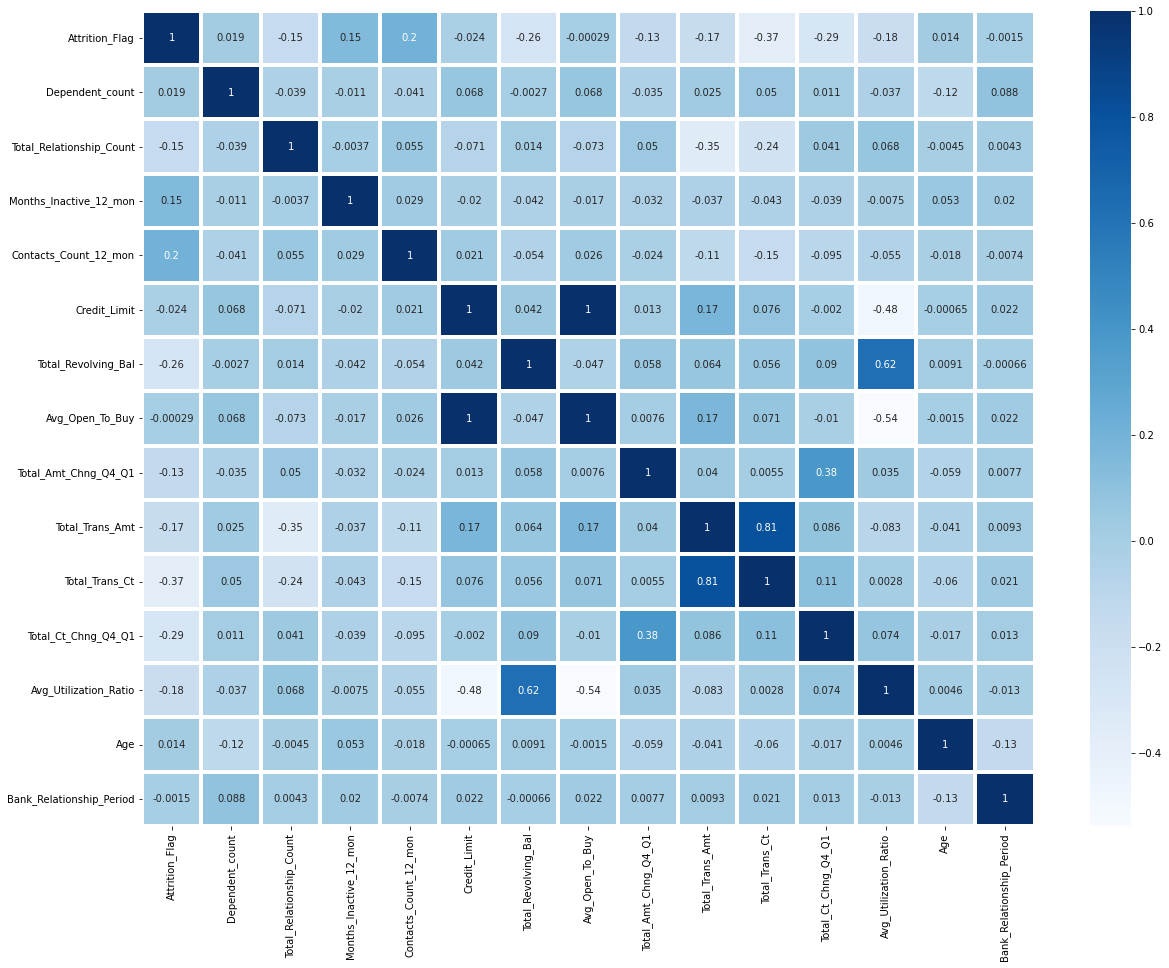

In [99]:
import matplotlib.pyplot as plt
corrmat = df.corr()
top_corr_features = corrmat.index

plt.figure(figsize=(20,15))

#plot heat map
import seaborn as sns
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="Blues",linewidths=3.5,
    linecolor='white')

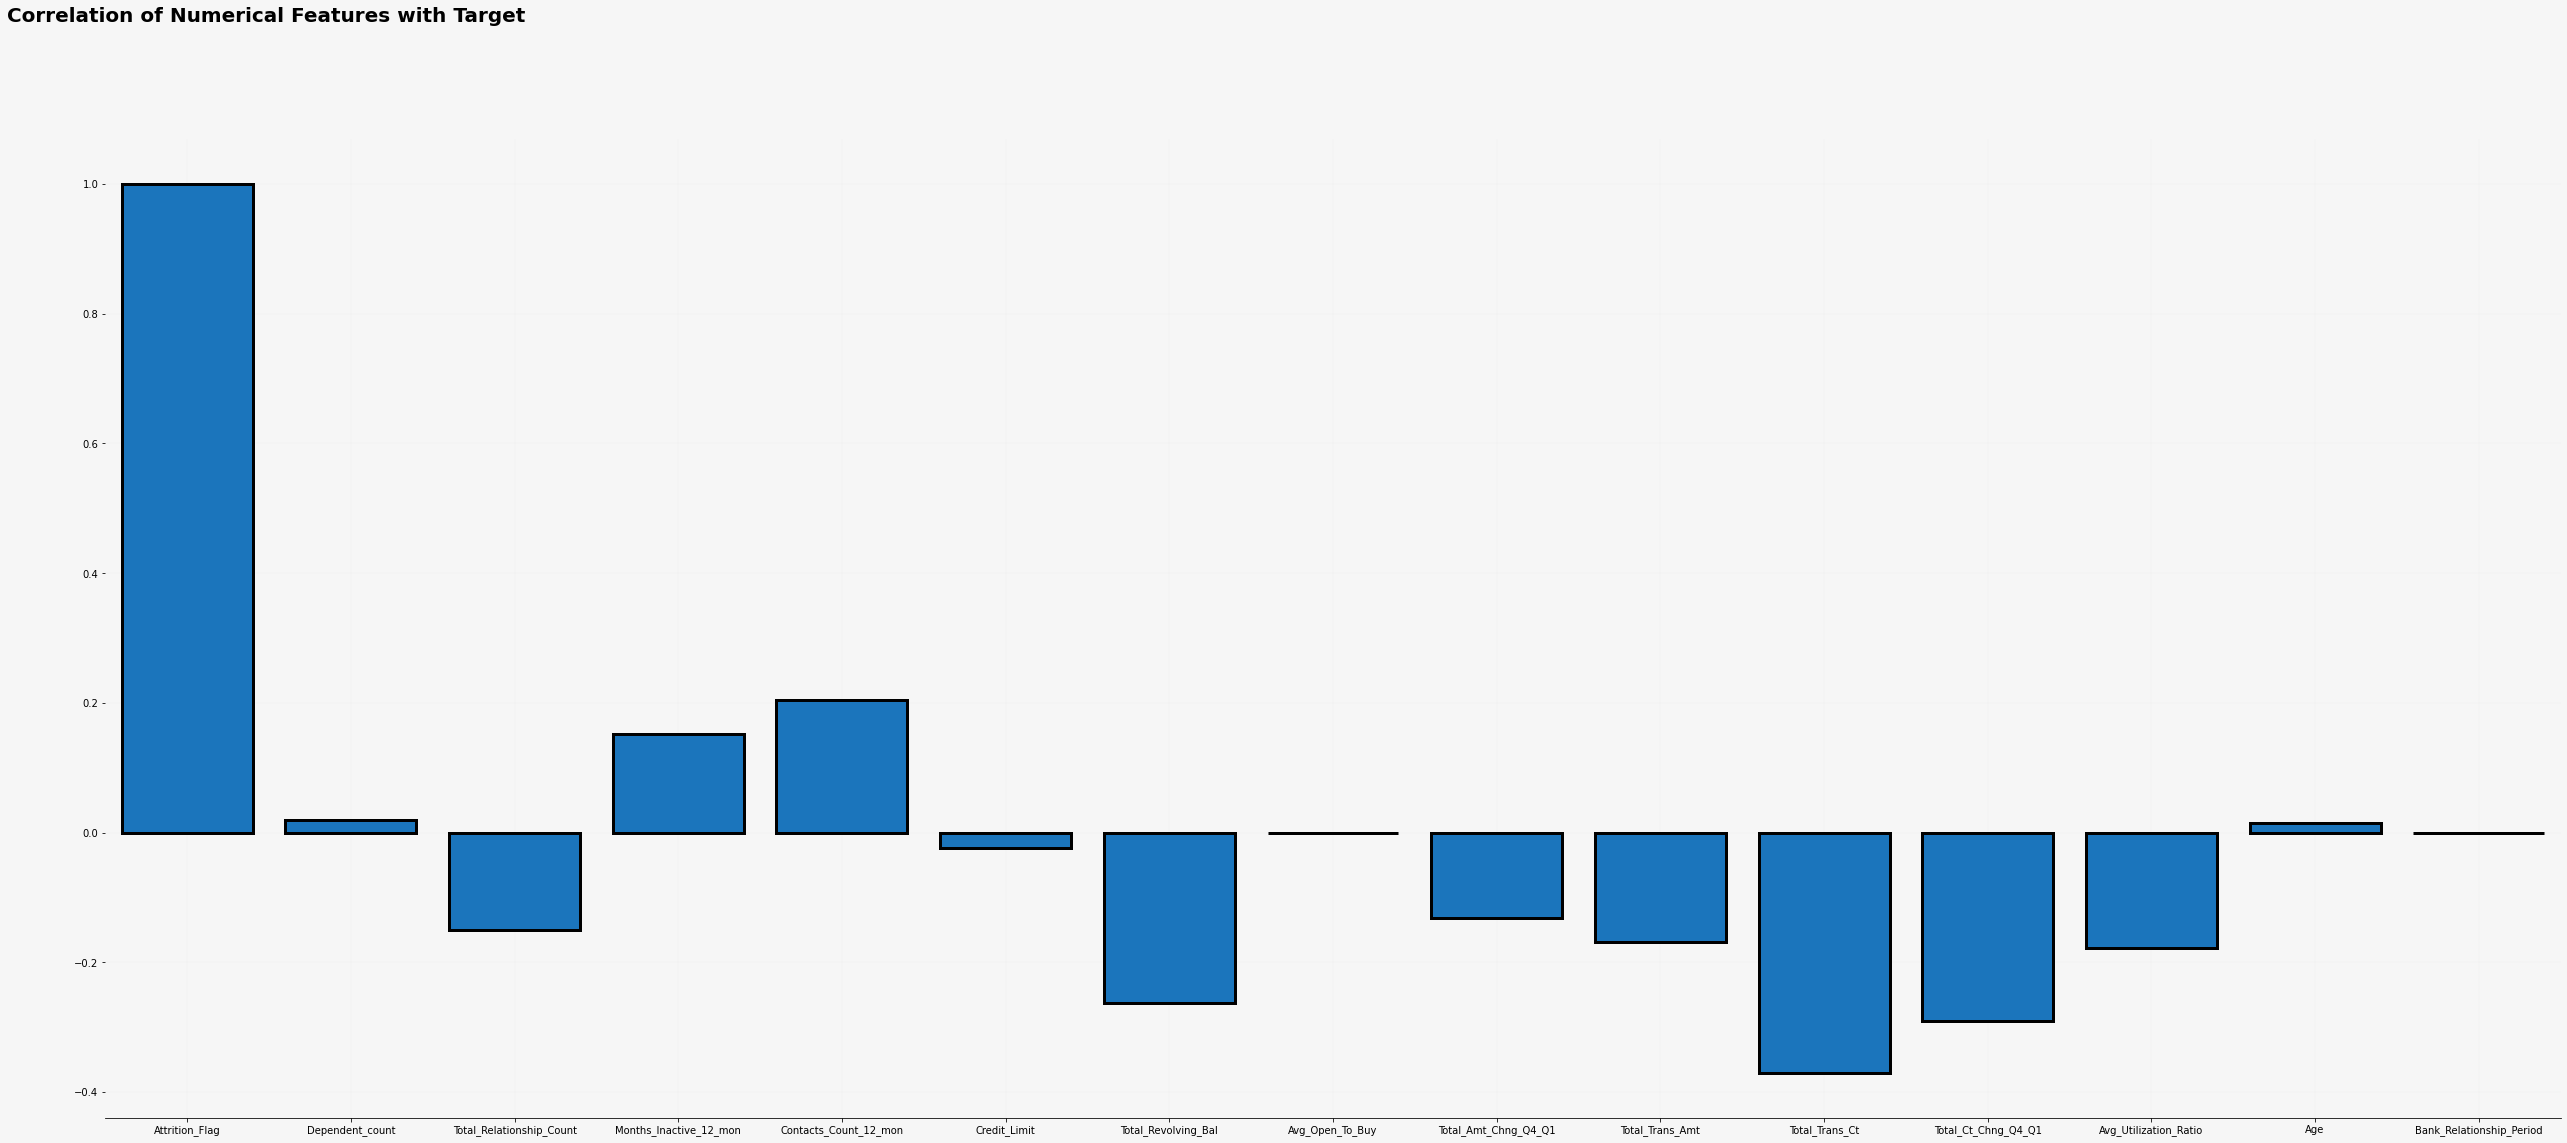

In [100]:
import matplotlib
background_color = "#f6f6f6"

fig = plt.figure(figsize=(44,18), facecolor=background_color)
gs = fig.add_gridspec(1, 1)
ax0 = fig.add_subplot(gs[0, 0])
colors = ["#0078d7"]
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

ax0.set_facecolor(background_color)
ax0.text(-1.1, 1.25, 'Correlation of Numerical Features with Target', fontsize=20, fontweight='bold')

chart_df = pd.DataFrame(df.corrwith(df['Attrition_Flag']))
chart_df.columns = ['corr']
sns.barplot(x=chart_df.index, y=chart_df['corr'], ax=ax0, color='#0078d7', zorder=3, edgecolor='black', linewidth=3)
ax0.grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
ax0.grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)
ax0.set_ylabel('')

for s in ["top","right", 'left']:
    ax0.spines[s].set_visible(False)

plt.show()


# Encoding The Categorical Features

In [101]:
#Now one hot encoding
df_new=pd.get_dummies(df, columns=['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category'],drop_first=False)
print(df_new.shape)

(10127, 38)


In [102]:
df_new.columns

Index(['Attrition_Flag', 'Dependent_count', 'Total_Relationship_Count',
       'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit',
       'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1',
       'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1',
       'Avg_Utilization_Ratio', 'Age', 'Bank_Relationship_Period', 'Gender_F',
       'Gender_M', 'Education_Level_College', 'Education_Level_Doctorate',
       'Education_Level_Graduate', 'Education_Level_High School',
       'Education_Level_Post-Graduate', 'Education_Level_Uneducated',
       'Education_Level_Unknown', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Unknown', 'Income_Category_$120K +',
       'Income_Category_$40K - $60K', 'Income_Category_$60K - $80K',
       'Income_Category_$80K - $120K', 'Income_Category_Less than $40K',
       'Income_Category_Unknown', 'Card_Category_Blue', 'Card_Category_Gold',
       'Card_Category_Pla

In [103]:
#Rearrangement of the columns......
df = df_new[[ 'Dependent_count', 'Total_Relationship_Count',
       'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit',
       'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1',
       'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1',
       'Avg_Utilization_Ratio', 'Age', 'Bank_Relationship_Period', 'Gender_F',
       'Gender_M', 'Education_Level_College', 'Education_Level_Doctorate',
       'Education_Level_Graduate', 'Education_Level_High School',
       'Education_Level_Post-Graduate', 'Education_Level_Uneducated',
       'Education_Level_Unknown', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Unknown', 'Income_Category_$120K +',
       'Income_Category_$40K - $60K', 'Income_Category_$60K - $80K',
       'Income_Category_$80K - $120K', 'Income_Category_Less than $40K',
       'Income_Category_Unknown', 'Card_Category_Blue', 'Card_Category_Gold',
       'Card_Category_Platinum', 'Card_Category_Silver','Attrition_Flag']]
df.head()

,Dependent_count,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,...,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver,Attrition_Flag
0,3,5,1,3,12691.0,777,11914.0,1.335,1144,42,...,0,1,0,0,0,1,0,0,0,0
1,5,6,1,2,8256.0,864,7392.0,1.541,1291,33,...,0,0,0,1,0,1,0,0,0,0
2,3,4,1,0,3418.0,0,3418.0,2.594,1887,20,...,0,0,1,0,0,1,0,0,0,0
3,4,3,4,1,3313.0,2517,796.0,1.405,1171,20,...,0,0,0,1,0,1,0,0,0,0
4,3,5,1,0,4716.0,0,4716.0,2.175,816,28,...,0,1,0,0,0,1,0,0,0,0


# Scaling the dataset

In [104]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit_transform(df.drop('Attrition_Flag',axis=1))
scaled_features = scaler.transform(df.drop('Attrition_Flag',axis=1))

In [105]:
scaled_features = pd.DataFrame(scaled_features, columns = df.columns[:-1])
scaled_features.head()

,Dependent_count,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,...,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,0.6,0.8,0.166667,0.500000,0.340190,0.308701,0.345116,0.392994,0.035273,0.248062,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,1.0,0.166667,0.333333,0.206112,0.343266,0.214093,0.453636,0.043452,0.178295,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,0.6,0.6,0.166667,0.000000,0.059850,0.000000,0.098948,0.763615,0.076611,0.077519,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.8,0.4,0.666667,0.166667,0.056676,1.000000,0.022977,0.413600,0.036775,0.077519,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.6,0.8,0.166667,0.000000,0.099091,0.000000,0.136557,0.640271,0.017025,0.139535,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


# Split The Features Into Training & Into Testing Dataset

In [106]:
X = scaled_features
y = df['Attrition_Flag']

In [107]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30,random_state = 0)

# Visualize Model Score

In [108]:
from sklearn.ensemble import RandomForestClassifier ,AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve ,KFold
from sklearn.metrics import roc_curve,accuracy_score,f1_score,auc,confusion_matrix,roc_auc_score,plot_confusion_matrix
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.tree import DecisionTreeClassifier

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



   CrossVal_Score_Means  CrossValerrors                    Algo
0              0.954430        0.006555  RandomForestClassifier
1              0.962613        0.006193      AdaBoostClassifier
2              0.954430        0.006180       Gradient Boosting
3              0.927624        0.005426    ExtraTreesClassifier
4              0.934396        0.008823  DecisionTreeClassifier


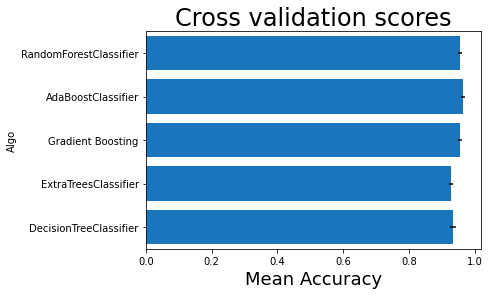

<Figure size 864x576 with 0 Axes>

In [109]:
# Cross validation on differnet set of algorithm!!!
# =============================================================================
################################################################
kfold = StratifiedKFold(n_splits=8,shuffle=True, random_state=42)


rs = 15
clrs = []

clrs.append(AdaBoostClassifier(random_state=rs))
clrs.append(GradientBoostingClassifier(random_state=rs))
clrs.append(RandomForestClassifier(random_state=rs))
clrs.append(ExtraTreesClassifier(random_state = rs))
clrs.append(DecisionTreeClassifier(random_state = rs))

cv_results = []
for clr in clrs :
    cv_results.append(cross_val_score(clr, X_train, y_train , scoring = 'accuracy', cv = kfold, n_jobs=-1))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())
    
cv_df = pd.DataFrame({"CrossVal_Score_Means":cv_means,"CrossValerrors": cv_std,"Algo":["RandomForestClassifier","AdaBoostClassifier","Gradient Boosting",'ExtraTreesClassifier','DecisionTreeClassifier']})
g = sns.barplot("CrossVal_Score_Means","Algo",data = cv_df,orient = "h",**{'xerr':cv_std},color = '#0078d7')
g.set_xlabel("Mean Accuracy",fontsize = 18)
g = g.set_title("Cross validation scores",fontsize = 24)
plt.figure(figsize = (12,8))
print(cv_df)

In [110]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

In [111]:
confusion_matrix(y_test, y_pred)

array([[2476,  107],
       [  94,  362]])

In [112]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      2583
           1       0.77      0.79      0.78       456

    accuracy                           0.93      3039
   macro avg       0.87      0.88      0.87      3039
weighted avg       0.93      0.93      0.93      3039



In [113]:
print(accuracy_score(y_test, y_pred))

0.9338598223099703


# Hyper Parameter Tunning

In [114]:
from sklearn.model_selection import GridSearchCV
grid_params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'min_samples_split' : range(2, 10, 1),
    'min_samples_leaf' : range(2, 10, 1)
}

grid_search = GridSearchCV(dtc, grid_params, cv = 5, n_jobs = -1, verbose = 1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 512 candidates, totalling 2560 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(2, 10)},
             verbose=1)

In [115]:
dtc = grid_search.best_estimator_
y_pred = dtc.predict(X_test)  

In [116]:
print(accuracy_score(y_test, y_pred))


0.9486673247778875


In [117]:
# best parameters and best score

print(grid_search.best_params_)
print(grid_search.best_score_)

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 9, 'min_samples_split': 9}
0.9449768228433101


# Checking The Best Estimators

In [118]:
ada = AdaBoostClassifier(base_estimator = dtc)

parameters = {
    'n_estimators' : [50, 70, 90, 120, 180, 200],
    'learning_rate' : [0.001, 0.01, 0.1, 1, 10],
    'algorithm' : ['SAMME', 'SAMME.R']
}

grid_search = GridSearchCV(ada, parameters, n_jobs = -1, cv = 10, verbose = 1)
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 60 candidates, totalling 600 fits


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_weight_boosting.py:657: RuntimeWarning: overflow encountered in exp
  + estimator_weight * incorrect * (sample_weight > 0)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_weight_boosting.py:486: UserWarning: Sample weights have reached infinite values, at iteration 4, causing overflow. Iterations stopped. Try lowering the learning rate.
  return super().fit(X, y, sample_weight)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_weight_boosting.py:657: RuntimeWarning: overflow encountered in exp
  + estimator_weight * incorrect * (sample_weight > 0)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_weight_boosting.py:486: UserWarning: Sample weights have reached infinite values, at iteration 4, causing overflow. Iterations stopped. Try lowering the learning rate.
  return super().fit(X, y, sample_weight)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_weight_boosting.py:657: RuntimeWarning: overflow 

GridSearchCV(cv=10,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                                                max_depth=10,
                                                                                min_samples_leaf=9,
                                                                                min_samples_split=9)),
             n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.001, 0.01, 0.1, 1, 10],
                         'n_estimators': [50, 70, 90, 120, 180, 200]},
             verbose=1)

In [119]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'algorithm': 'SAMME', 'learning_rate': 1, 'n_estimators': 120}
0.9709356298757699


# Train The Model With Best Hyper Parameters

In [120]:
ada = AdaBoostClassifier(base_estimator = dtc, algorithm = 'SAMME', learning_rate = 1, n_estimators = 120)
ada.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                         max_depth=10,
                                                         min_samples_leaf=9,
                                                         min_samples_split=9),
                   learning_rate=1, n_estimators=120)

# Ploting The Confusion matrix

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



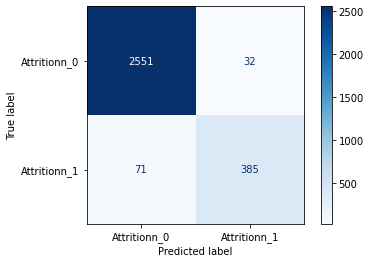

In [121]:
plot_confusion_matrix(ada,
                      X_test, y_test,
                      cmap=plt.cm.Blues,
                      display_labels = ['Attritionn_0','Attritionn_1'])
plt.grid(False)
plt.show();

In [122]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2583
           1       0.85      0.80      0.82       456

    accuracy                           0.95      3039
   macro avg       0.91      0.89      0.90      3039
weighted avg       0.95      0.95      0.95      3039



In [123]:
print(accuracy_score(y_test, y_pred))

0.9486673247778875


# Feature Importance

In [124]:
feature = pd.Series(ada.feature_importances_, index = X_train.columns).sort_values(ascending = False)
print(feature)

Total_Trans_Amt                   0.177281
Total_Amt_Chng_Q4_Q1              0.116487
Total_Trans_Ct                    0.111084
Total_Ct_Chng_Q4_Q1               0.092204
Total_Revolving_Bal               0.071368
Credit_Limit                      0.058045
Total_Relationship_Count          0.057003
Avg_Open_To_Buy                   0.049285
Avg_Utilization_Ratio             0.034380
Contacts_Count_12_mon             0.032026
Months_Inactive_12_mon            0.031267
Dependent_count                   0.024729
Age                               0.024422
Bank_Relationship_Period          0.021783
Marital_Status_Married            0.011042
Education_Level_Graduate          0.007576
Marital_Status_Single             0.006558
Income_Category_$80K - $120K      0.006374
Income_Category_$60K - $80K       0.006089
Gender_M                          0.006037
Education_Level_Uneducated        0.005853
Education_Level_Unknown           0.005099
Education_Level_High School       0.005063
Income_Cate

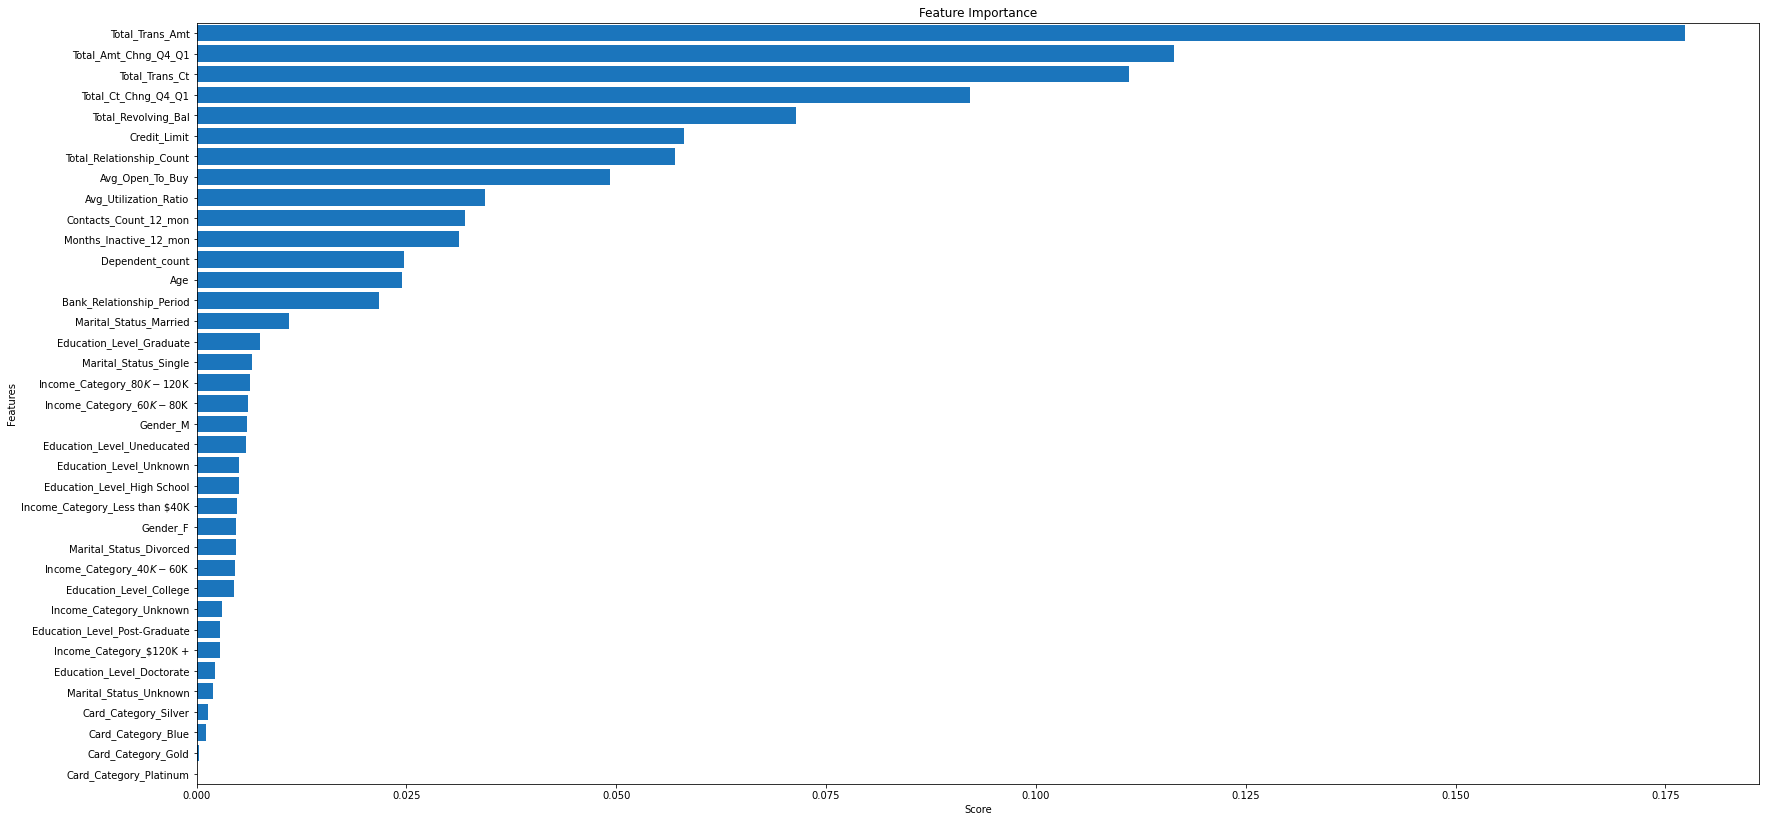

In [125]:
plt.figure(figsize = (28,14))
sns.barplot(x = feature, y = feature.index,color = '#0078d7')
plt.title("Feature Importance")
plt.xlabel('Score')
plt.ylabel('Features')
plt.show()

# Conclusion:

1. There are 16.07% of customers who have churned.

2. The proportion of gender count is almost equally distributed (52.9% male and 47.1%) compare to proportion of existing and attributed customer count (83.9% and 16.1%) which is highly imbalanced.

3. The proportion of attrited customers by gender there are 14.4% more male than female who have churned.

4. Customers who have churned are highly educated - A high proportion of education level of attrited customer is Graduate level (29.9%), followed by Post-Graduate level (18.8%).

5. A high proportion of marital status of customers who have churned is Married (43.6%), followed by Single (41.1%) compared to Divorced (7.4%) and Unknown (7.9%) status - Marital stuats of the attributed customers are highly clustered in Married status and Single.

6. As you can see from the proportion of income category of attrited customer, it is highly concentrated around  
60K−80K income (37.6%), followed by Less than 40K income(16.7120K + (11.5%). I assume that customers with higher income doesn't likely to leave their credit card services than meddle-income customer.